# Лабораторная работа №1
## Выполнил студент группы БВТ2102 Голованов Никита Андреевич

### Оглавление
1. [Задание 1](#Задание-№1)
2. [Задание 2](#Задание-№2)
3. [Задание 3](#Задание-№3)
4. [Вывод](#Вывод)

In [92]:
def _siftup(heap, pos):
    endpos = len(heap)
    startpos = pos
    newitem = heap[pos]
    childpos = 2*pos + 1
    while childpos < endpos:
        rightpos = childpos + 1
        if rightpos < endpos and not heap[childpos] < heap[rightpos]:
            childpos = rightpos
        heap[pos] = heap[childpos]
        pos = childpos
        childpos = 2*pos + 1
    heap[pos] = newitem
    _siftdown(heap, startpos, pos)
    
def _siftdown(heap, startpos, pos):
    newitem = heap[pos]
    while pos > startpos:
        parentpos = (pos - 1) >> 1
        parent = heap[parentpos]
        if newitem < parent:
            heap[pos] = parent
            pos = parentpos
            continue
        break
    heap[pos] = newitem

def heappush(heap, item):
    heap.append(item)
    _siftdown(heap, 0, len(heap)-1)

def heappop(heap):
    lastelt = heap.pop()
    if heap:
        returnitem = heap[0]
        heap[0] = lastelt
        _siftup(heap, 0)
        return returnitem
    return lastelt

### Задание №1
<i> Вызвать функцию print() и передать туда строку Hello, World! </i>

In [93]:
print("Hello, World!")

Hello, World!


### Задание №2
Написать генератор случайных матриц(многомерных), который принимает
опциональные параметры <b>m</b>, <b>n</b>, <b>min_limit</b>, <b>max_limit</b>, где <b>m</b> и <b>n</b> указывают размер
матрицы, а <b>min_lim</b> и <b>max_lim</b> - минимальное и максимальное значение для
генерируемого числа.

In [94]:
import random
import time
import numpy as np

def randmatrx(m, n , min_limit, max_limit): 
    return [[random.randint(min_limit, max_limit) for i in range(m)] for j in range(n)]
    

In [95]:
#user_m = input()
#user_n = input()
#user_min_limit = input()
#user_max_limit = input()
#print(randmatrx(int(user_m), int(user_n), int(user_max_limit), int(user_min_limit)))

### Задание №3
Реализовать методы сортировки строк числовой матрицы в соответствии с
заданием. Оценить время работы каждого алгоритма сортировки и сравнить его со
временем стандартной функции сортировки. Испытания проводить на сгенерированных
матрицах.

In [96]:
import copy
   
   
matrix = randmatrx(100, 100, -50, 50)

def sort_matrix(matrix, sort_func):
    for i in range(len(matrix)):
        sort_func(matrix[i].copy())
        

# Сортировка выбором.
#
# O(n^2) - время
# O(n) - память
def selection_sort(arr):
    for i in range(len(arr) - 1):
        min_index = i
        for k in range(i + 1, len(arr)):
            if arr[k] < arr[min_index]:
                min_index = k
        arr[i], arr[min_index] = arr[min_index], arr[i]
    return arr

# Сортировка вставкой.
#
# O(n^2) - время
# O(n) - память
def insertion_sort(arr):
    for i in range(1, len(arr)):
        j = i - 1
        while j >= 0 and arr[j] > arr[j + 1]:
            arr[j], arr[j+1] = arr[j+1], arr[j]
            j-=1
    return arr

# Сортировка обменом. || Сортировка пузырьком.
#
# O(n^2) - время
# O(n) - память
def bubble_sort(arr):
    for i in range(len(arr) - 1):
        for j in range(len(arr) - 1):
            if arr[j+1] < arr[j]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

# Сортировка Шелла.
#
# O(n^2) - время
# O(n) - память        
def shell_sort(data):
    last_index = len(data)
    step = len(data)//2
    while step > 0:
        for i in range(step, last_index, 1):
            j = i
            delta = j - step
            while delta >= 0 and data[delta] > data[j]:
                data[delta], data[j] = data[j], data[delta]
                j = delta
                delta = j - step
        step //= 2
    return data

# Быстрая сортировка.
#
# O(n * log(n)) - время
# O(n) - память
def quick_sort(arr):
    if len(arr) < 2:
        return arr
    low, same, high = [], [], []
    pivot = arr[random.randint(0, len(arr) - 1)]
    for item in arr:
        if item < pivot:
            low.append(item)
        elif item == pivot:
            same.append(item)
        elif item > pivot:
            high.append(item)
    return quick_sort(low) + same + quick_sort(high)

# Турнирная сортировка.
#
# O(n * log(n)) - время
# O(n) - память
def tour_sort(arr):  
    heap = []
    winners = []
    losers = []
    heaplen = 0
    i = 0
    
    while i < len(arr):
        if (heaplen < len(arr)//2 + 1):
            heappush(heap, arr[i])
            heaplen+=1
            i+=1
        else:
            elem = heappop(heap)
            heaplen-=1
            if (len(winners) == 0):
                winners.append(elem)
            elif (winners[-1] <= elem):
                winners.append(elem)
            else:
                losers.append(elem)
    while heap:
            elem = heappop(heap)
            heaplen-=1
            if (len(winners) == 0):
                winners.append(elem)
            elif (winners[-1] <= elem):
                winners.append(elem)
            else:
                losers.append(elem)
    for i in range(len(losers)):
        for j in range(len(winners)):
            if ( winners[j] >= losers[i] ):
                winners = winners[:j] + [losers[i]] + winners[j:]
                break
    arr = winners
    return arr

   



In [97]:
# Сортировка выбором.
# Берётся срез массива, в котором минимальный элемент переносят в самый левый угол,
# после чего срез уменьшается и цикл повторяется.
start_time = time.time()
sort_matrix(matrix, selection_sort)
print("--- {0} ms ---".format(round((time.time() - start_time)*1000)))


--- 22 ms ---


In [98]:
# Сортировка вставкой.
start_time = time.time()
sort_matrix(matrix, insertion_sort)
print("--- {0} ms ---".format(round((time.time() - start_time)*1000)))

--- 51 ms ---


In [99]:
# Сортировка обменом. || Сортировка пузырьком.
start_time = time.time()
sort_matrix(matrix, bubble_sort)
print("--- {0} ms ---".format(round((time.time() - start_time)*1000)))

--- 72 ms ---


In [100]:
# Сортировка Шелла.
start_time = time.time()
sort_matrix(matrix, shell_sort)
print("--- {0} ms ---".format(round((time.time() - start_time)*1000)))

--- 8 ms ---


In [101]:
# Быстрая сортировка.
start_time = time.time()
sort_matrix(matrix, quick_sort)
print("--- {0} ms ---".format(round((time.time() - start_time)*1000)))
    

--- 14 ms ---


In [102]:
# Турнирная сортировка.
start_time = time.time()
sort_matrix(matrix, tour_sort)
print("--- {0} ms ---".format(round((time.time() - start_time)*1000)))

--- 26 ms ---


### Вывод


In [103]:
import matplotlib.pyplot as plt


sorts = [selection_sort,insertion_sort,bubble_sort,shell_sort,quick_sort,tour_sort]

times = [[] for i in range(len(sorts))]

list = [i for i in range(10)]

for i in list:
    matrix = randmatrx(1 + 10*i, 1 + 10*i, -50, 50)
    for sort in sorts:
        start_time = time.time()
        sort_matrix(matrix, sort)
        times[sorts.index(sort)].append(round((time.time() - start_time)*1000))

print(times)





[[0, 0, 0, 2, 2, 3, 5, 8, 11, 15], [0, 0, 1, 1, 3, 4, 8, 11, 17, 27], [0, 0, 1, 3, 4, 9, 14, 23, 35, 44], [0, 0, 0, 1, 1, 2, 2, 3, 5, 6], [0, 0, 1, 1, 2, 2, 3, 4, 6, 7], [0, 0, 1, 1, 3, 4, 6, 9, 12, 14]]


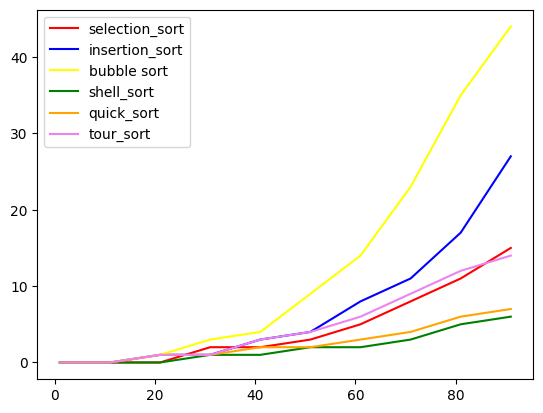

In [104]:
n = [1 + 10*i for i in list]


plt.plot(n, times[0], color = 'red', label = 'selection_sort')#selection_sort
plt.plot(n, times[1], color = 'blue', label = 'insertion_sort')#insertion_sort
plt.plot(n, times[2], color = 'yellow', label = 'bubble sort')#bubble sort
plt.plot(n, times[3], color = 'green', label = 'shell_sort')#shell_sort
plt.plot(n, times[4], color = 'orange', label = 'quick_sort')#quick_sort
plt.plot(n, times[5], color = 'violet', label = 'tour_sort')#tour_sort
plt.legend()
plt.show()

# Выводы:

- Наиболее быстро работают:
    Сортировка шелла, быстрая сортировка и турнирная сортировка